In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

# 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

# 검증세트
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 544us/sample - loss: 0.6924 - accuracy: 0.5595 - val_loss: 0.6917 - val_accuracy: 0.5970
Epoch 2/100
20000/20000 [==============================] - 8s 410us/sample - loss: 0.6901 - accuracy: 0.6144 - val_loss: 0.6884 - val_accuracy: 0.6266
Epoch 3/100
20000/20000 [==============================] - 8s 398us/sample - loss: 0.6803 - accuracy: 0.6165 - val_loss: 0.6661 - val_accuracy: 0.5274
Epoch 4/100
20000/20000 [==============================] - 8s 399us/sample - loss: 0.6322 - accuracy: 0.6608 - val_loss: 0.6151 - val_accuracy: 0.7324
Epoch 5/100
20000/20000 [==============================] - 8s 394us/sample - loss: 0.5974 - accuracy: 0.7456 - val_loss: 0.5934 - val_accuracy: 0.7502
Epoch 6/100
20000/20000 [==============================] - 8s 404us/sample - loss: 0.5782 - accuracy: 0.7595 - val_loss: 0.5785 - val_accuracy: 0.7504
Epoch 7/100
20000/20000 [===================

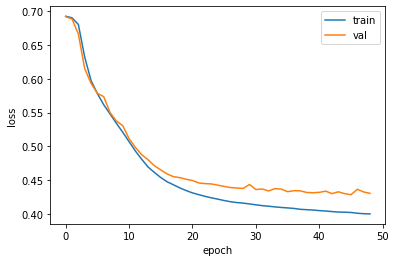

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 541us/sample - loss: 0.6926 - accuracy: 0.5299 - val_loss: 0.6919 - val_accuracy: 0.5712
Epoch 2/100
20000/20000 [==============================] - 9s 430us/sample - loss: 0.6907 - accuracy: 0.5844 - val_loss: 0.6895 - val_accuracy: 0.6156
Epoch 3/100
20000/20000 [==============================] - 9s 439us/sample - loss: 0.6867 - accuracy: 0.6268 - val_loss: 0.6832 - val_accuracy: 0.6592
Epoch 4/100
20000/20000 [==============================] - 9s 444us/sample - loss: 0.6672 - accuracy: 0.6596 - val_loss: 0.6392 - val_accuracy: 0.6928
Epoch 5/100
20000/20000 [==============================] - 9s 434us/sample - loss: 0.6140 - accuracy: 0.7046 - val_loss: 0.6025 - val_accuracy: 0.7086
Epoch 6/100
20000/20000 [==============================] - 8s 414us/sample - loss: 0.5888 - accuracy: 0.7192 - val_loss: 0.5812 - val_accuracy: 0.7260
Epoch 7/100
20000/20000 [===================

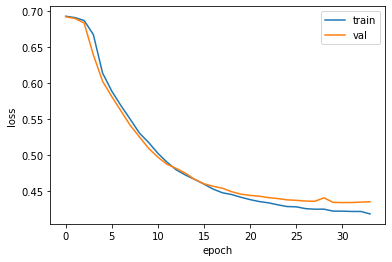

In [9]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 20s 998us/sample - loss: 0.6927 - accuracy: 0.5380 - val_loss: 0.6923 - val_accuracy: 0.5820
Epoch 2/100
20000/20000 [==============================] - 16s 803us/sample - loss: 0.6909 - accuracy: 0.5971 - val_loss: 0.6882 - val_accuracy: 0.6220
Epoch 3/100
20000/20000 [==============================] - 16s 795us/sample - loss: 0.6772 - accuracy: 0.6273 - val_loss: 0.6518 - val_accuracy: 0.6430
Epoch 4/100
20000/20000 [==============================] - 16s 801us/sample - loss: 0.6068 - accuracy: 0.6988 - val_loss: 0.5687 - val_accuracy: 0.7206
Epoch 5/100
20000/20000 [==============================] - 16s 810us/sample - loss: 0.5489 - accuracy: 0.7348 - val_loss: 0.5283 - val_accuracy: 0.7448
Epoch 6/100
20000/20000 [==============================] - 16s 796us/sample - loss: 0.5168 - accuracy: 0.7542 - val_loss: 0.5048 - val_accuracy: 0.7620
Epoch 7/100
20000/20000 [==============

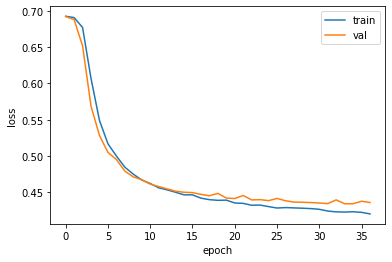

In [13]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()